In [1]:
import numpy as np
import pandas as pd


In [11]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [12]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [13]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [15]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
import seaborn as sns

In [27]:
df = df.drop(['Serial No.'],axis=1)

In [58]:
df.rename(columns = {'Chance of Admit ':'Chance', 'LOR ':'LOR'}, inplace = True)

In [59]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance'],
      dtype='object')

## Data Visualization

<AxesSubplot:>

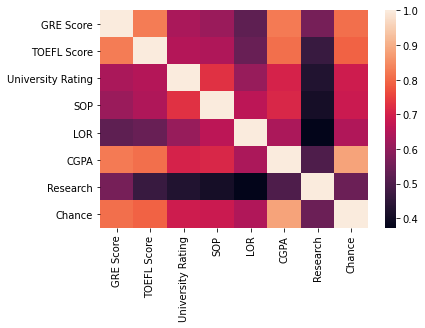

In [60]:
sns.heatmap(df.corr())

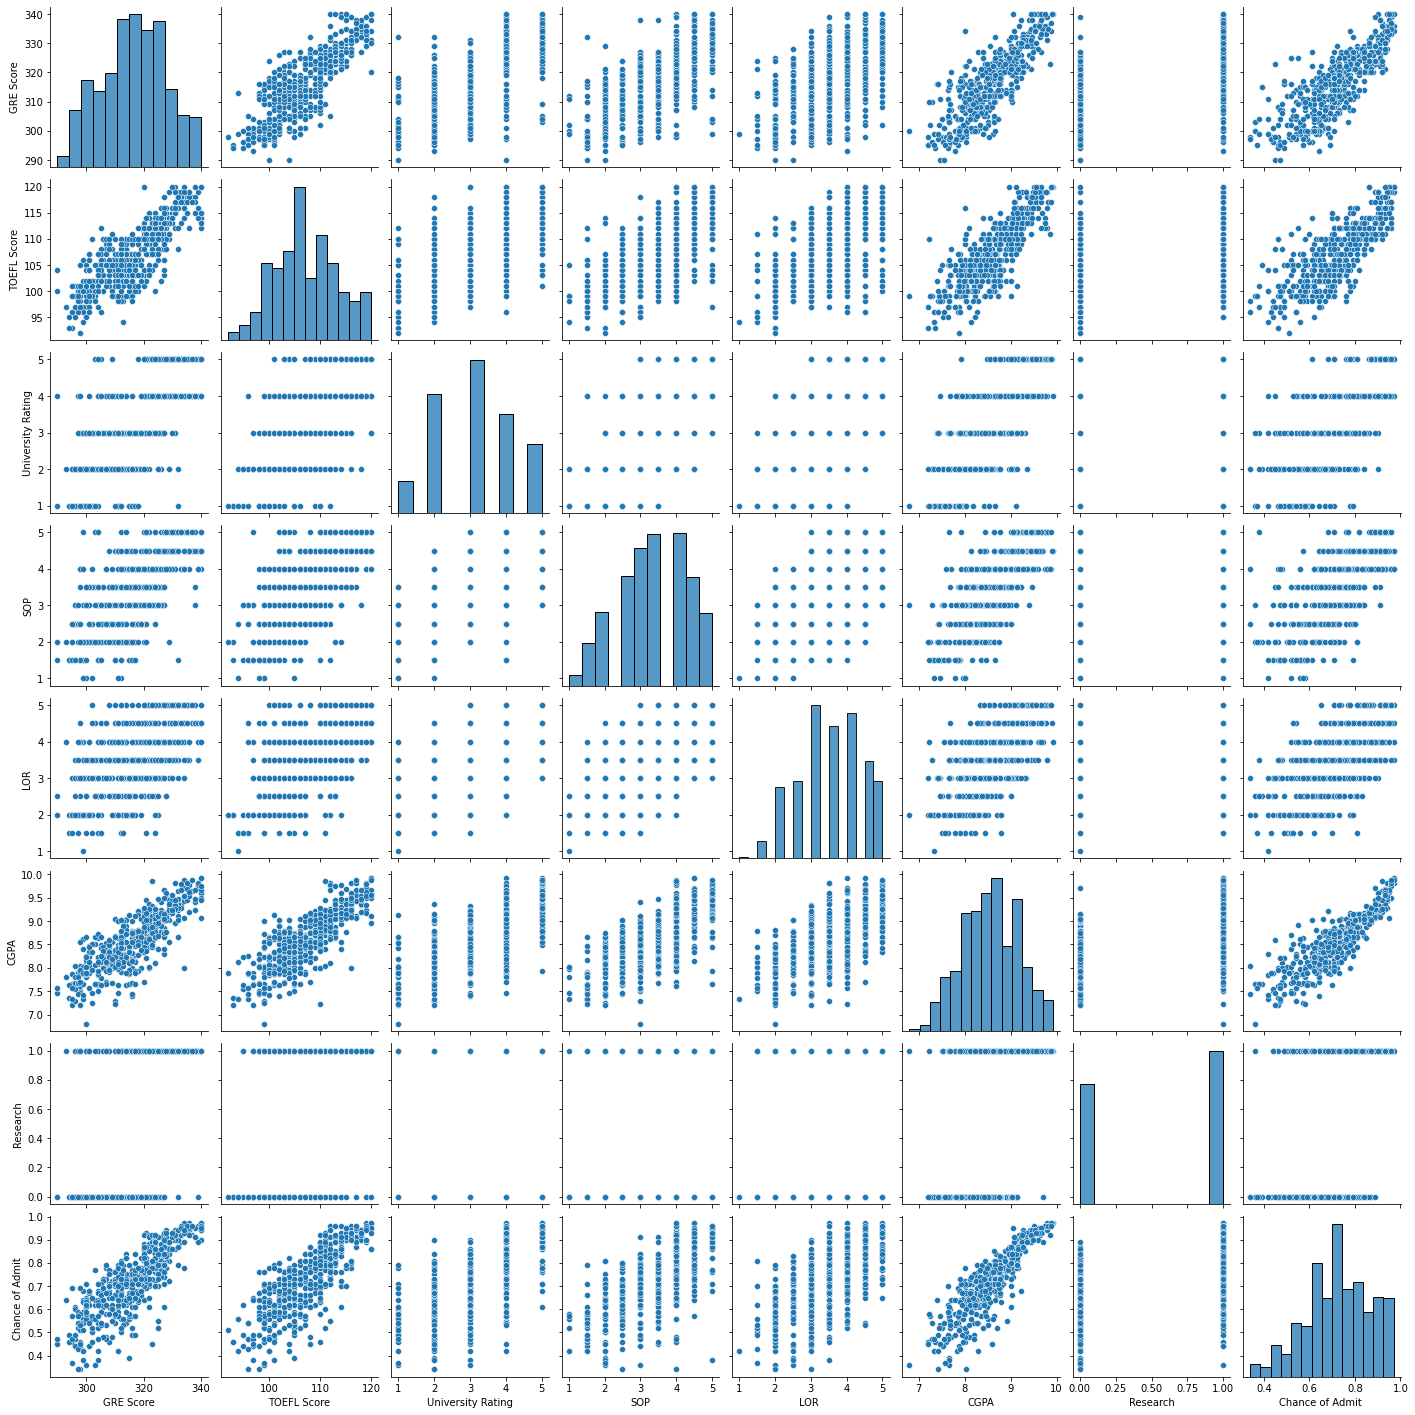

In [35]:
sns.pairplot(data= df)

<AxesSubplot:xlabel='Chance', ylabel='LOR'>

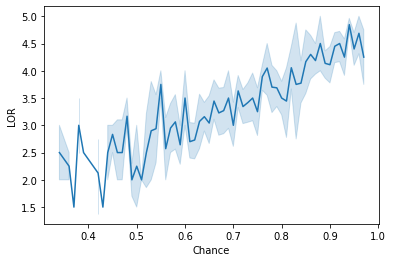

In [64]:
sns.lineplot(data = df,  x="Chance",y="LOR")

<AxesSubplot:xlabel='Chance', ylabel='TOEFL Score'>

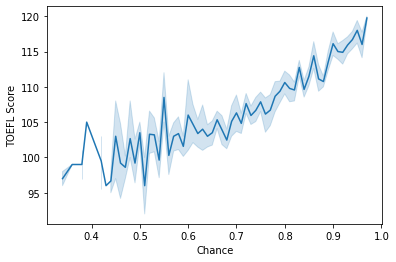

In [66]:
sns.lineplot(data = df,  x="Chance",y="TOEFL Score")

<AxesSubplot:xlabel='Chance', ylabel='GRE Score'>

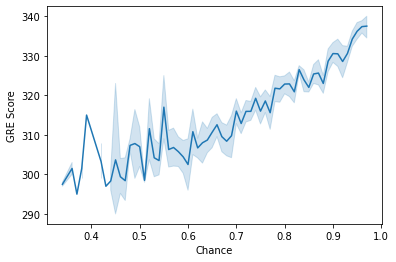

In [67]:
sns.lineplot(data = df,  x="Chance",y="GRE Score")

<AxesSubplot:xlabel='Chance', ylabel='CGPA'>

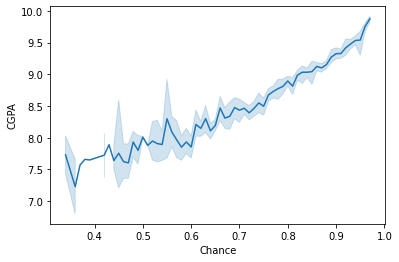

In [68]:
sns.lineplot(data = df,  x="Chance",y="CGPA")

<AxesSubplot:xlabel='Chance', ylabel='SOP'>

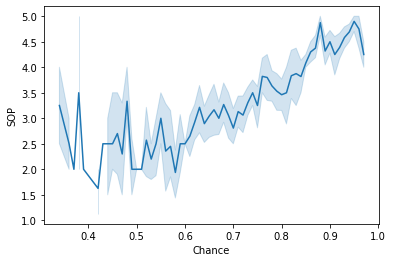

In [71]:
sns.lineplot(data = df,  x="Chance",y="SOP")

## Linear Regression Model Preparation


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [89]:
X, y = df.iloc[:,:-1],df["Chance"]

In [571]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

In [572]:
model = LinearRegression()

In [573]:
model.fit(X_train,y_train)

LinearRegression()

In [574]:
preds = model.predict(X_test)

In [575]:
from sklearn.metrics import mean_squared_error,r2_score


In [576]:
mean_squared_error(y_test,preds)

0.0033245482935572927

In [577]:
r2_score(y_test,preds)

0.8185677278975831

In [101]:
from scipy.special import expit

In [106]:
def ok(s):
    if s>=0.5:
        return "YES"
    else:
        return "NO"

In [108]:
admission = y.apply(ok)

In [110]:
admission.value_counts()

YES    463
NO      37
Name: Chance, dtype: int64

<AxesSubplot:xlabel='Chance', ylabel='Count'>

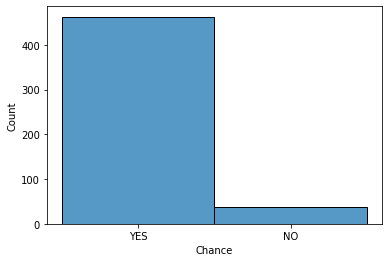

In [112]:
sns.histplot(admission)

## Using Keras Neural Network Model

In [585]:
from keras.models import Sequential
from keras.layers import Dense

In [586]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance'],
      dtype='object')

In [162]:
X_train.shape

(335, 7)

In [163]:
X_test.shape

(165, 7)

In [168]:
X, y = df.iloc[:,:-1].values,df["Chance"].values

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

In [551]:
model =Sequential()
model.add(Dense(25,input_dim=7,activation='relu'))

In [552]:
# model.add(Dense(900,activation='relu'))
# model.add(Dense(800,activation='relu'))
# model.add(Dense(700,activation='relu'))
# model.add(Dense(600,activation='relu'))
# model.add(Dense(500,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))

In [553]:
model.add(Dense(1))

In [554]:
model.compile(optimizer="adam", loss="mse")

In [555]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
11/11 [==============================] - 0s 2ms/step - loss: 8.0287
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2822
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1860
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1092
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0244
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 11/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 12/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 13/20
11/11 [==============================

In [556]:
preds4 = model.predict(X_test)

In [557]:
preds4.reshape(165,)

array([0.74321276, 0.775731  , 0.73118573, 0.7220561 , 0.7604096 ,
       0.68057793, 0.7068891 , 0.7582927 , 0.77625114, 0.71230686,
       0.7609519 , 0.73026705, 0.73445827, 0.7443464 , 0.73168087,
       0.73852   , 0.73059654, 0.6929755 , 0.7336072 , 0.718368  ,
       0.7371232 , 0.69547486, 0.7132064 , 0.7155972 , 0.7165228 ,
       0.7309037 , 0.73302007, 0.7212815 , 0.7164936 , 0.7506241 ,
       0.7107698 , 0.7221475 , 0.7397831 , 0.73279965, 0.7507319 ,
       0.70171386, 0.7384301 , 0.7648139 , 0.7180987 , 0.7052629 ,
       0.71644455, 0.7175252 , 0.6860783 , 0.73341787, 0.73921865,
       0.7477107 , 0.7559892 , 0.70056176, 0.6797442 , 0.7163038 ,
       0.75024116, 0.7221516 , 0.7140523 , 0.72775483, 0.6796426 ,
       0.69863665, 0.74759907, 0.72508085, 0.7153002 , 0.740354  ,
       0.7104931 , 0.71474034, 0.73204327, 0.7059768 , 0.692545  ,
       0.7262557 , 0.68781626, 0.7474488 , 0.68929124, 0.728799  ,
       0.69227254, 0.73793817, 0.7566116 , 0.7470604 , 0.68285

In [558]:
print("Mean Square error is: ",mean_squared_error(y_test,preds4))
print("r2 score is: ",r2_score(y_test,preds4))

Mean Square error is:  0.014284862068192888
r2 score is:  0.2204249260796005


In [559]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0143


0.014284862205386162

## Using Callbacks

In [560]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [561]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [562]:
model_save = ModelCheckpoint('best_model.hdf5',save_best_only=True)

In [563]:
model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test),callbacks = [model_save,early_stopping])

Epoch 1/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0160 - val_loss: 0.0143
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0160 - val_loss: 0.0143
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0160 - val_loss: 0.0142
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0160 - val_loss: 0.0142
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0160 - val_loss: 0.0143
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0160 - val_loss: 0.0142
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0160 - val_loss: 0.0142
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0160 - val_loss: 0.0142
Epoch 9/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0160 - val_loss: 0.0142
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0160 - val_loss: 0.0142


In [564]:
preds3 = model.predict(X_test)

In [565]:
preds3.shape

(165, 1)

In [566]:
y_test.shape

(165,)

In [567]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.0142


0.014235462062060833

In [568]:
preds3.reshape(165,)

array([0.74366176, 0.77646464, 0.73205847, 0.72263414, 0.7613724 ,
       0.68148386, 0.7072361 , 0.7586038 , 0.7770422 , 0.7128544 ,
       0.76168966, 0.7310068 , 0.7351301 , 0.74497837, 0.7328249 ,
       0.7392987 , 0.7311108 , 0.69344515, 0.7343985 , 0.71862733,
       0.73804736, 0.6959102 , 0.7136818 , 0.71594423, 0.7170893 ,
       0.73150545, 0.73391396, 0.72155213, 0.7171184 , 0.7514702 ,
       0.7113208 , 0.72249943, 0.74059874, 0.733537  , 0.7513688 ,
       0.7022639 , 0.73860276, 0.7658213 , 0.7187987 , 0.7057543 ,
       0.7168705 , 0.71829724, 0.6867643 , 0.734215  , 0.73976547,
       0.7486084 , 0.75683314, 0.70119494, 0.68013006, 0.7168991 ,
       0.7511416 , 0.722521  , 0.7147982 , 0.72816485, 0.68025315,
       0.6991024 , 0.7484732 , 0.7255251 , 0.7158335 , 0.7411055 ,
       0.7108917 , 0.715196  , 0.7326709 , 0.70662326, 0.6932734 ,
       0.7266113 , 0.6886147 , 0.74826145, 0.68958837, 0.7297323 ,
       0.69273174, 0.73845303, 0.75757504, 0.74781823, 0.68348

In [569]:
mean_squared_error(y_test,preds3)

0.014235462395041436

In [570]:
r2_score(y_test,preds3)

0.2231208396743447

## Linear Regression model is performing very well in this case. It is even better than complex Neural Network model.

In [580]:
X,y = df.iloc[:,:-1],df["Chance"]

In [581]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

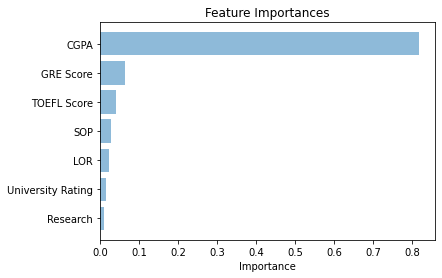

In [584]:
import matplotlib.pyplot as plt
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

## Visulaizing important Features